In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set dataset directory
dataset_dir = '/content/drive/MyDrive/Thesis/Dataset/picture_dataset'


In [ ]:
# Step 1: Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    rotation_range=20,    # Augmentation: Rotate images
    width_shift_range=0.2,  # Augmentation: Shift images horizontally
    height_shift_range=0.2, # Augmentation: Shift images vertically
    shear_range=0.2,      # Augmentation: Shear transformations
    zoom_range=0.2,       # Augmentation: Random zoom
    horizontal_flip=True, # Augmentation: Randomly flip images horizontally
    validation_split=0.2  # Split dataset into training (80%) and validation (20%)
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Step 2: Load Training, Validation, and Test Data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'   # Use this for training
)

val_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation' # Use this for validation
)

Found 5096 images belonging to 2 classes.
Found 1274 images belonging to 2 classes.


In [ ]:
# Assuming you have a separate test set in your directory
test_generator = val_datagen.flow_from_directory(
    f'{dataset_dir}',  # Directory containing the test data
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 6370 images belonging to 2 classes.


In [ ]:
# Step 3: Model Architecture
model = Sequential()

# First Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D feature maps into a 1D vector
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer for Binary Classification
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Step 4: Compile the Model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 5: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 2372s 14s/step - accuracy: 0.8455 - loss: 0.4735 - val_accuracy: 0.8524 - val_loss: 0.4187
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.8482 - loss: 0.4428 - val_accuracy: 0.8524 - val_loss: 0.4325
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8500 - loss: 0.4367 - val_accuracy: 0.8524 - val_loss: 0.4181
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8507 - loss: 0.4328 - val_accuracy: 0.8524 - val_loss: 0.4294
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.8538 - loss: 0.4262 - val_accuracy: 0.8524 - val_loss: 0.4259
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8613 - loss: 0.4160 - val_accuracy: 0.8524 - val_loss: 0.4185
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.8524 - loss: 0.4315 - val_accuracy: 0.8524 - val_loss: 0.4228
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8621 - loss: 0.4089 - val_accuracy: 0.8

In [ ]:
# Step 6: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}, Test Loss: {test_loss:.4f}")

200/200 ━━━━━━━━━━━━━━━━━━━━ 91s 455ms/step - accuracy: 0.5749 - loss: 0.8956
Test Accuracy: 0.85, Test Loss: 0.4204


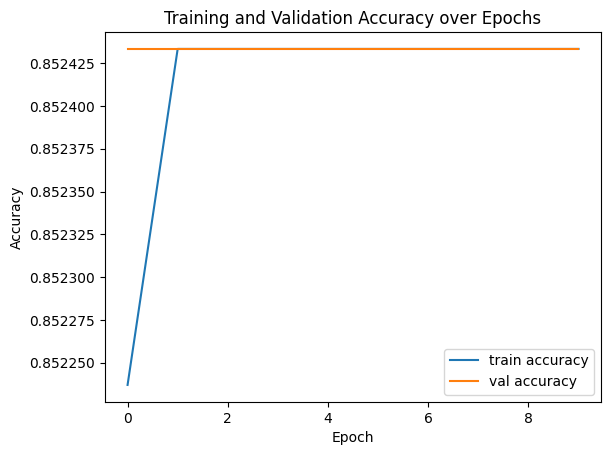

In [ ]:
# Step 7: Plot the Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()

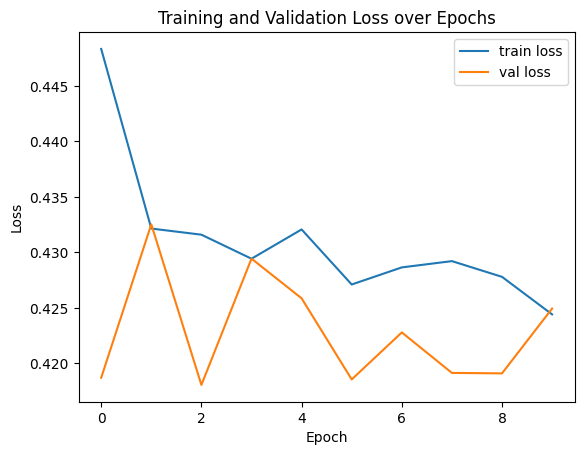

In [ ]:
# Step 7: Plot the Training and Validation Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
# Step 8: Evaluate the Model on the Validation Set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}, Validation Loss: {val_loss:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 481ms/step - accuracy: 0.8685 - loss: 0.3980
Validation Accuracy: 0.85, Validation Loss: 0.4249
